In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [24]:
# データ生成（多重共線性を含む）
np.random.seed(42)
n_samples = 200  # サンプル数
X1 = np.random.rand(n_samples) * 10
X2 = 2 * X1 + np.random.normal(0, 0.1, n_samples)  # X1と強い相関を持つ
X3 = np.random.rand(n_samples) * 10
y = 3 * X1 + 2 * X2 - X3 + np.random.normal(0, 2, n_samples)  # 目的変数

# データフレーム化
data = pd.DataFrame({"X1": X1, "X2": X2, "X3": X3, "y": y})

# モデル構築用データと評価用データに分割
train_data, test_data = train_test_split(data, test_size=0.5, random_state=42)

X_train = train_data[["X1", "X2", "X3"]]
y_train = train_data["y"]
X_test = test_data[["X1", "X2", "X3"]]
y_test = test_data["y"]

In [25]:


# Ridge回帰を使用して重回帰分析とリッジ回帰を統合
alphas = [0, 1.0]  # alpha=0で重回帰分析, alpha=1.0でリッジ回帰
results = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 結果を記録
    results.append({
        "alpha": alpha,
        "coefficients": model.coef_,
        "intercept": model.intercept_,
        "R2": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    })

# 結果を表示
for result in results:
    print(f"--- alpha = {result['alpha']} ---")
    print("回帰係数:", result["coefficients"])
    print("切片:", result["intercept"])
    print("R^2スコア（テストデータ）:", result["R2"])
    print("RMSE（テストデータ）:", result["RMSE"])


--- alpha = 0 ---
回帰係数: [-1.51708035  4.28800747 -0.93978243]
切片: -0.5419648061637155
R^2スコア（テストデータ）: 0.9904253965863228
RMSE（テストデータ）: 2.066075614562788
--- alpha = 1.0 ---
回帰係数: [ 0.96724899  3.0449324  -0.93847369]
切片: -0.5319950582350472
R^2スコア（テストデータ）: 0.9906084283349904
RMSE（テストデータ）: 2.0462323819173056


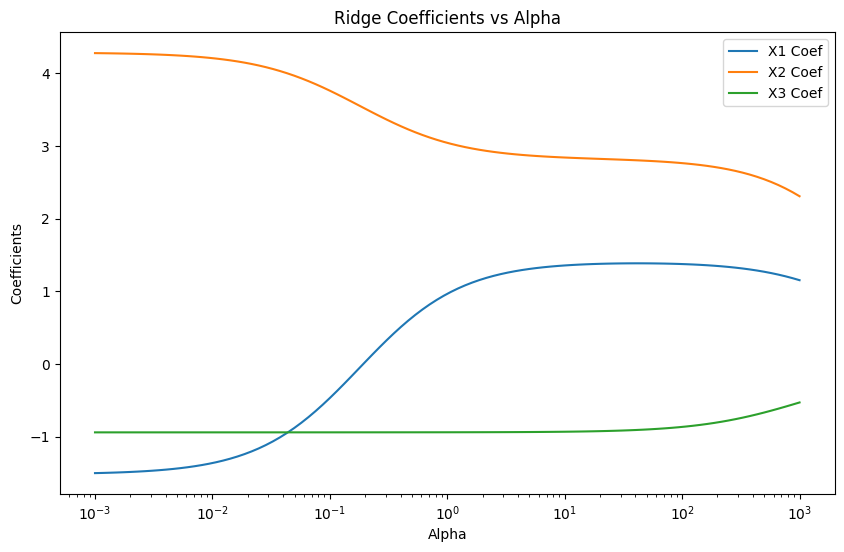

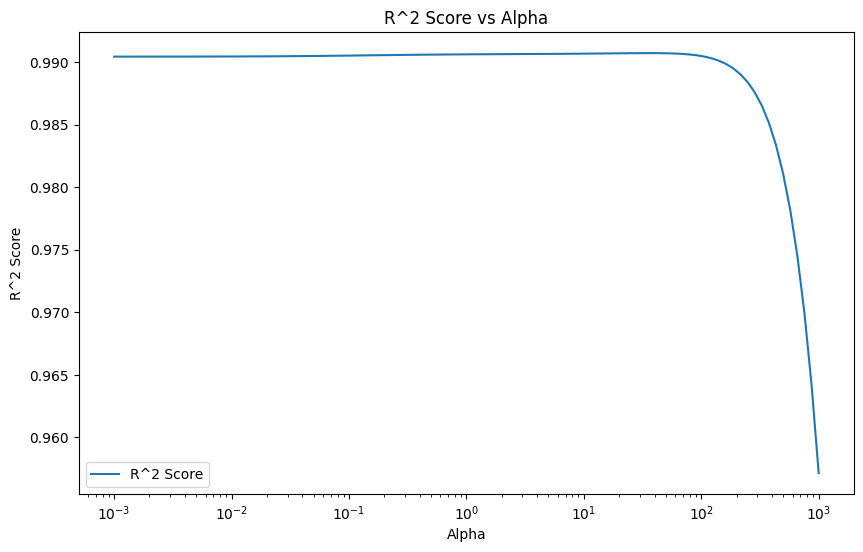

In [26]:

# alphaを広範囲で調査（リッジ回帰の挙動を確認）
alphas = np.logspace(-3, 3, 100)
ridge_coefs = []
ridge_scores = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    ridge_coefs.append(model.coef_)
    ridge_scores.append(r2_score(y_test, model.predict(X_test)))

ridge_coefs = np.array(ridge_coefs)

# リッジ回帰の回帰係数の変化をプロット
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_coefs[:, 0], label="X1 Coef")
plt.plot(alphas, ridge_coefs[:, 1], label="X2 Coef")
plt.plot(alphas, ridge_coefs[:, 2], label="X3 Coef")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Coefficients")
plt.title("Ridge Coefficients vs Alpha")
plt.legend()
plt.show()

# リッジ回帰のR^2スコアの変化をプロット
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_scores, label="R^2 Score")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("R^2 Score")
plt.title("R^2 Score vs Alpha")
plt.legend()
plt.show()

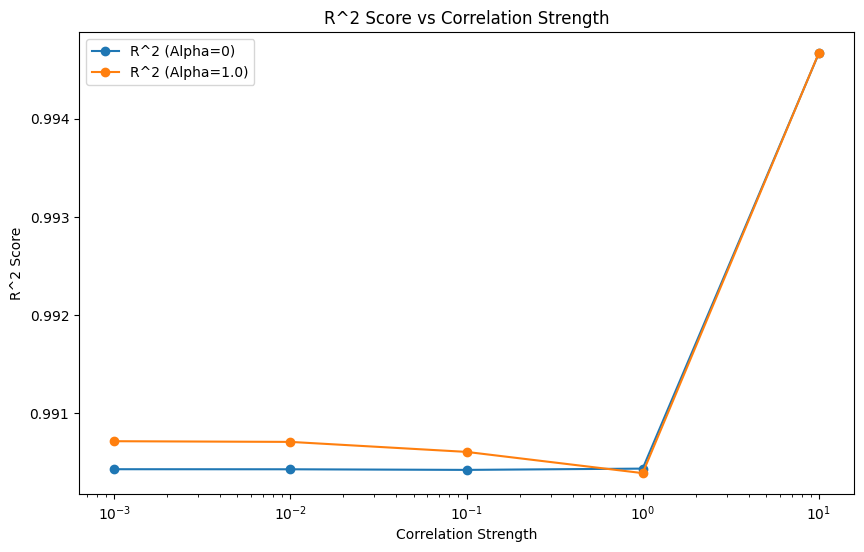

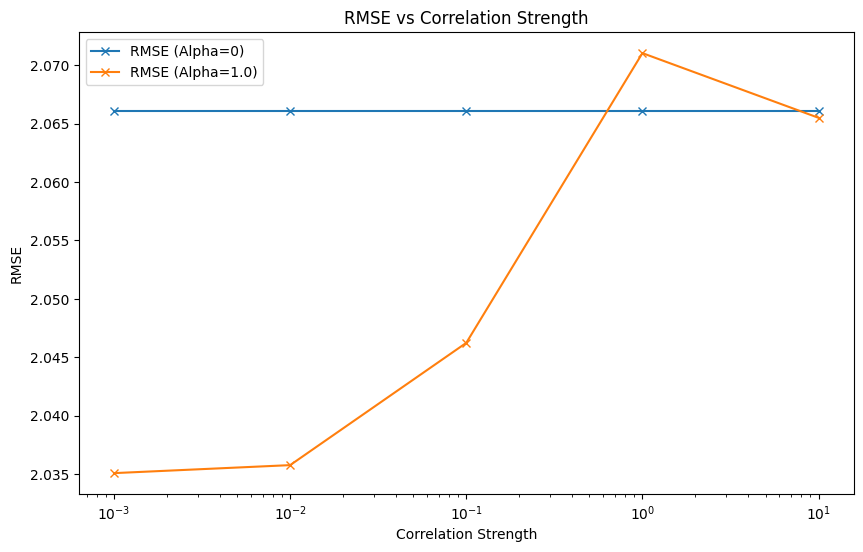

In [35]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 多重共線性の強さを変える実験
correlation_strengths =[0.001, 0.01, 0.1, 1, 10]
n_samples = 200  # サンプル数
results = []

for strength in correlation_strengths:
    np.random.seed(42)
    # 説明変数の生成
    X1 = np.random.rand(n_samples) * 10
    X2 = 2 * X1 + np.random.normal(0, strength, n_samples)
    X3 = np.random.rand(n_samples) * 10
    y = 3 * X1 + 2 * X2 - X3 + np.random.normal(0, 2, n_samples)  # 目的変数

    # データ分割
    data = pd.DataFrame({"X1": X1, "X2": X2, "X3": X3, "y": y})
    train_data, test_data = train_test_split(data, test_size=0.5, random_state=42)

    X_train = train_data[["X1", "X2", "X3"]]
    y_train = train_data["y"]
    X_test = test_data[["X1", "X2", "X3"]]
    y_test = test_data["y"]

    # 重回帰分析 (Ridge alpha=0)
    model = Ridge(alpha=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Correlation Strength": strength,
        "Alpha": 0,
        "Coefficients": model.coef_,
        "Intercept": model.intercept_,
        "R2": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    })

    # リッジ回帰 (alpha=1.0)
    model_ridge = Ridge(alpha=1.0)
    model_ridge.fit(X_train, y_train)
    y_pred_ridge = model_ridge.predict(X_test)

    results.append({
        "Correlation Strength": strength,
        "Alpha": 1.0,
        "Coefficients": model_ridge.coef_,
        "Intercept": model_ridge.intercept_,
        "R2": r2_score(y_test, y_pred_ridge),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_ridge))
    })
results_df = pd.DataFrame(results)

# R^2スコアのプロット
plt.figure(figsize=(10, 6))
for alpha in [0, 1.0]:  # alpha=0が重回帰、alpha=1がリッジ回帰
    subset = results_df[results_df["Alpha"] == alpha]
    plt.plot(
        subset["Correlation Strength"],
        subset["R2"],
        label=f"R^2 (Alpha={alpha})",
        marker="o",
    )
plt.xscale("log")
plt.xlabel("Correlation Strength")
plt.ylabel("R^2 Score")
plt.title("R^2 Score vs Correlation Strength")
plt.legend()
plt.show()

# RMSEのプロット
plt.figure(figsize=(10, 6))
for alpha in [0, 1.0]:  # alpha=0が重回帰、alpha=1がリッジ回帰
    subset = results_df[results_df["Alpha"] == alpha]
    plt.plot(
        subset["Correlation Strength"],
        subset["RMSE"],
        label=f"RMSE (Alpha={alpha})",
        marker="x",
    )
plt.xscale("log")
plt.xlabel("Correlation Strength")
plt.ylabel("RMSE")
plt.title("RMSE vs Correlation Strength")
plt.legend()
plt.show()